Source of this specific notebook: [Link](https://docs.microsoft.com/en-us/learn/modules/intro-machine-learning-pytorch/3-data?ns-enrollment-type=LearningPath&ns-enrollment-id=learn.pytorch.pytorch-fundamentals) and [Link2](https://docs.microsoft.com/en-us/learn/modules/intro-machine-learning-pytorch/4-transforms?ns-enrollment-type=LearningPath&ns-enrollment-id=learn.pytorch.pytorch-fundamentals)

# Datasets and Dataloaders

Primary Purpose: <br>
    - Make processing of data more maintainable/efficient <br>
    - Decouple it well from model development codes <br>

`Dataset`: (`torch.utils.data.Dataset`) <br>
- stores samples and their corresponding labels <br>
- Makes access to public datasets and your own datasets easier for model to access

`Dataloader`: (`torch.utils.data.DataLoader`) <br>
    - Wraps an `iterable` around the `Dataset` so that model can access well

`Dataset` is the primary class where as `DataLoader` is a wrapper around `Dataset`

### What are the list of torch classes/sub-packages and salient points covered in this notebook?
 - `torch.utils.data.Dataset` and `torch.utils.data.DataLoader`
     - Helps in processing of data easier and efficient for models
     - `Dataset` retrieves features and labels one sample at a time <br>
     - What does `DataLoaders` do? <br>
         - For model training, <br>
         - we need data fed in `minibatches` <br>
         - reshuffle the data (to reduce model overfitting)
         - `multiprocessing` to speed up data retrieval 
 <br>
 <br>
 - `torchvision.datasets` --> to use pre-existing datasets like FashionMNIST, coco, cifar, etc.,
     - torchvision.datasets have arguments/parameters to `transform` featuers (aka inputs) and `target_transform` to transform labels (like one hot encoding of labels
 - CustomDatasetClass must overwrite the `magic methods` of python such as 
     - `__init__`, `__getitem__` and `__len__` methods inherited from `Dataset`
 - `torchvision.transforms.ToTensor` (to transform/modify the features) and `torchvision.transforms.Lambda` (to transform the target/labels)
     - `torchvision.transforms.ToTensor()` converts features to normalized tensors
     - `torchvision.transforms.Lambda` could be used to transform labels
         - ```python
         
         Lambda(lambda y: torch.zeros(number_of_classes,dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1)
                  )`
           ```
          - `Tensor.scatter_` is used to change values of a tensor variable at specified indices

In [1]:
%matplotlib inline

In [2]:
import torch
from torch.utils.data import Dataset # why is this needed here? `Dataset` class is inherited inside a `CustomDataset` calss
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

In [3]:
help(Dataset)

Help on class Dataset in module torch.utils.data.dataset:

class Dataset(typing.Generic)
 |  Dataset(*args, **kwds)
 |  
 |  An abstract class representing a :class:`Dataset`.
 |  
 |  All datasets that represent a map from keys to data samples should subclass
 |  it. All subclasses should overwrite :meth:`__getitem__`, supporting fetching a
 |  data sample for a given key. Subclasses could also optionally overwrite
 |  :meth:`__len__`, which is expected to return the size of the dataset by many
 |  :class:`~torch.utils.data.Sampler` implementations and the default options
 |  of :class:`~torch.utils.data.DataLoader`.
 |  
 |  .. note::
 |    :class:`~torch.utils.data.DataLoader` by default constructs a index
 |    sampler that yields integral indices.  To make it work with a map-style
 |    dataset with non-integral indices/keys, a custom sampler must be provided.
 |  
 |  Method resolution order:
 |      Dataset
 |      typing.Generic
 |      builtins.object
 |  
 |  Methods defined 

In [4]:
help(datasets)

Help on package torchvision.datasets in torchvision:

NAME
    torchvision.datasets

PACKAGE CONTENTS
    _utils
    caltech
    celeba
    cifar
    cityscapes
    coco
    fakedata
    flickr
    folder
    hmdb51
    imagenet
    kinetics
    kitti
    lsun
    mnist
    omniglot
    phototour
    places365
    samplers (package)
    sbd
    sbu
    semeion
    stl10
    svhn
    ucf101
    usps
    utils
    video_utils
    vision
    voc
    widerface

CLASSES
    torch.utils.data.dataset.Dataset(typing.Generic)
        torchvision.datasets.vision.VisionDataset
            torchvision.datasets.caltech.Caltech101
            torchvision.datasets.caltech.Caltech256
            torchvision.datasets.celeba.CelebA
            torchvision.datasets.cifar.CIFAR10
                torchvision.datasets.cifar.CIFAR100
            torchvision.datasets.cityscapes.Cityscapes
            torchvision.datasets.coco.CocoDetection
                torchvision.datasets.coco.CocoCaptions
            tor

#### Loading Fashion-MNIST data

In [3]:
!mkdir -p ../data

In [5]:
training_data = datasets.FashionMNIST(
    root="../data",
    train=True,
    download=True, # if the data is saved in the root directory
    transform=ToTensor()
)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448265233/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
test_data = datasets.FashionMNIST(
        root="../data",
        train=False,
        download=True,
        transform=ToTensor()
)

In [30]:
help(datasets.FashionMNIST.__init__)

Help on function __init__ in module torchvision.datasets.mnist:

__init__(self, root: str, train: bool = True, transform: Union[Callable, NoneType] = None, target_transform: Union[Callable, NoneType] = None, download: bool = False) -> None
    Initialize self.  See help(type(self)) for accurate signature.



In [31]:
help(datasets.FashionMNIST.__getitem__)

Help on function __getitem__ in module torchvision.datasets.mnist:

__getitem__(self, index: int) -> Tuple[Any, Any]
    Args:
        index (int): Index
    
    Returns:
        tuple: (image, target) where target is index of the target class.



In [32]:
help(datasets.FashionMNIST.__len__)

Help on function __len__ in module torchvision.datasets.mnist:

__len__(self) -> int



In [23]:
!ls ../data/FashionMNIST/raw/

t10k-images-idx3-ubyte	   train-images-idx3-ubyte
t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte	   train-labels-idx1-ubyte
t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz


### Iterating (using Dataloader) and Visualizing the Dataset

In [27]:
training_data[0][1]

9

In [28]:
training_data[0][0].shape

torch.Size([1, 28, 28])

In [8]:
len(training_data)

60000

In [9]:
torch.randint(len(training_data), size=(1,))

tensor([19913])

In [10]:
_, label = training_data[19913]

In [11]:
label

4

In [13]:
type(training_data[0])

tuple

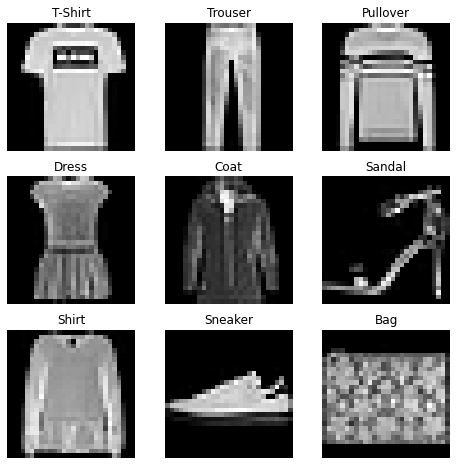

In [16]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"
}

# matplotlib code to visualize one example for each
figure = plt.figure(figsize=(8,8))
cols,rows = 3,3
for i in range(1,cols * rows + 1):
    for img_index in range(len(training_data)):
        if training_data[img_index][1] == i - 1:
            img, label = training_data[img_index]
            # indexing the subplot
            figure.add_subplot(rows, cols, i)
            plt.title(labels_map[label])
            plt.axis("off")
            plt.imshow(img.squeeze(),cmap="gray")
            break
plt.show()

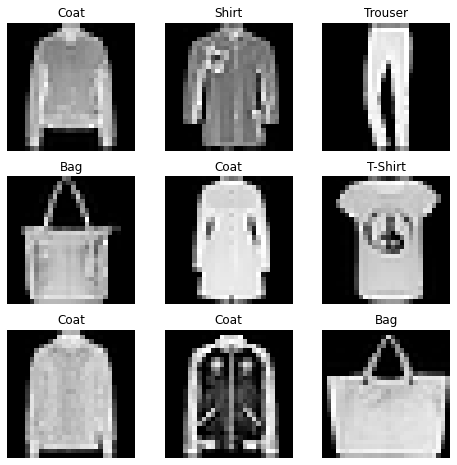

In [18]:
# original lines of code
# show random 9 images
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Custom `Dataset`

`torch.utils.data.Dataset` is inherited inside Custom Dataset

`CustomDatasetClass` must contain  `__init__`, `__getitem__` and `__len__` methods

In [24]:
import os
import pandas as pd
import torchvision.io as tvio

In [33]:
# similar to torchvision.datasets.FashionMNIST

class CustomImageDataset(Dataset):
    """FashionMNIST Image Dataset Class"""
    def __init__(self, 
                 annotations_file,
                 img_dir,
                 transform=None,
                 target_transform=None):
        """
        Args:
            transform (Optional): dataset will take an optional argument transform 
                so that any required processing can be applied on the sample
        """
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    
    def __len__(self):
        return len(self.img)
    
    def __getitem__(self, idx):
        # format of data
        # tshirt1.jpg, 0
        # tshirt2.jpg, 0
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx,0])
        image = tvio.read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        sample = {"image": image, "label": label}
        return sample

### Training with DataLoaders

- `Dataset` retrieves features and labels one sample at a time
What does `DataLoaders` do? <br>
- For model training, <br>
    - we need data fed in `minibatches` <br>
    - reshuffle the data (to reduce model overfitting)
    - `multiprocessing` to speed up data retrieval

In [35]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

How can we iterate through DataLoader

train_features.size()
train_labels.size()


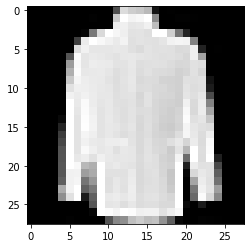

Label: 4


In [39]:
train_features, train_labels = next(iter(train_dataloader))
print(f"train_features.size()")
print(f"train_labels.size()")

img = train_features[0].squeeze()
label = train_labels[1]

plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

### Transforms in `Dataset`

- Feature Transformation needed for `MNIST`: `Normalized Tensors` (using `ToTensor`)
- Label Transformation: convert integer labels into one hot encoded tensors

In [41]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="../data/",
    train=True,
    download=True,
    transform=ToTensor(), # converts a Python Imaging Library (PIL) to float tensors within rag
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).
                            scatter_(dim=0, # across rows
                                     index=torch.tensor(y), 
                                    vaue=1) # scatter_ assigns a value=1 to the index mentioned in y
                           )
)

In [42]:
target_transform = Lambda(lambda y: torch.zeros(10, dtype=torch.float).
                         scatter_(dim=0, index=torch.tensor(y), value=1))

In [44]:
labels = [5, 6, 7]

In [47]:
torch.zeros(10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(labels), value=1)

tensor([0., 0., 0., 0., 0., 1., 1., 1., 0., 0.])